In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt


In [113]:
metadata = pd.read_csv('ml-data/movies_metadata.csv', low_memory=False)
user_data = pd.read_csv('ml-data/ratings.csv')

In [8]:
minimum_votes = metadata.vote_count.quantile(0.90)
average_rating = metadata.vote_average.mean()

def calculate_weighted_rating(row):
    num_votes = row['vote_count']
    rating  = row['vote_average']
    
    a = (num_votes/(num_votes+minimum_votes)) * rating
    b = (minimum_votes/(num_votes+minimum_votes))* average_rating
    return a+b

metadata_2 = metadata.loc[metadata['vote_count'] > minimum_votes]
metadata_2['weighted_rating'] = metadata_2.apply(calculate_weighted_rating, axis=1)

In [9]:
top_movies = metadata_2[['title','vote_count', 'vote_average', 'weighted_rating']].sort_values('weighted_rating', ascending=False).head(20)
top_movies.index.name  = 'id'

In [10]:
top_movies.to_csv('ml-data/top_movies.csv')

In [13]:
test,train = train_test_split(user_data)

## Random Recommendation

In [84]:
from tqdm import tqdm

# users = train.userId.unique()
users = []
for i in range(50000):
    users.append(i)

correct=0
incorrect=0
neutral = 0
not_reviewed = 0
movies = metadata['id'].unique()
for user in tqdm(users):
    user_ratings = test.loc[test['userId'] == user]
    movies_reviewed = user_ratings['movieId'].unique()
    for i in range(5):
        recommendation = int(random.choice(movies))
        if recommendation  in movies_reviewed:
            rating = float(user_ratings['rating'].loc[user_ratings['movieId'] == recommendation])
            if(rating >=3.5):
                correct+=1
            elif(rating< 2.5):
                incorrect+=1
            else:
                neutral+=1
        else:
            not_reviewed+=1


100%|██████████| 50000/50000 [20:02<00:00, 41.57it/s]


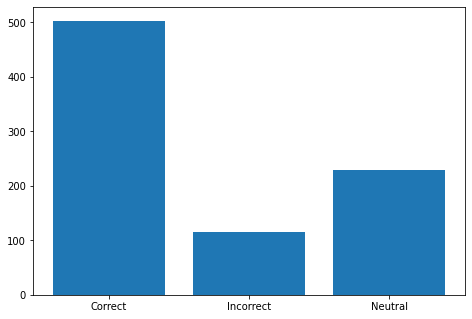

In [110]:


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Correct', 'Incorrect', 'Neutral']
values = [503,115,229] #[correct, incorrect, neutral]
ax.bar(labels,values)
plt.show()

## Most Popular

In [103]:
users = []
for i in range(50000):
    users.append(i)

correct=0
incorrect=0
neutral = 0
not_reviewed = 0

for user in tqdm(users):
    user_ratings = test.loc[test['userId'] == user]
    movies_reviewed = user_ratings['movieId'].unique()
    recommendations = top_movies.head(5).index.unique()
    for recommendation in recommendations:
        if recommendation  in movies_reviewed:
            rating = float(user_ratings['rating'].loc[user_ratings['movieId'] == recommendation])
            if(rating >=3.5):
                correct+=1
            elif(rating< 2.5):
                incorrect+=1
            else:
                neutral+=1
        else:
            not_reviewed+=1

100%|██████████| 50000/50000 [20:50<00:00, 40.00it/s]


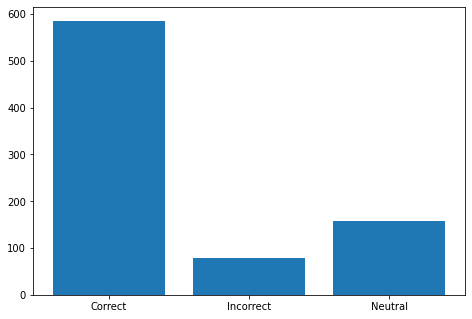

In [109]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Correct', 'Incorrect', 'Neutral']
values = [correct, incorrect, neutral]
ax.bar(labels,values)
plt.show()

# Content-Based Recommender

In [111]:
metadata['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
4    Just when George Banks has recovered from his ...
5    Obsessive master thief, Neil McCauley leads a ...
8    International action superstar Jean Claude Van...
Name: overview, dtype: object

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

metadata['overview'] = metadata['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(metadata['overview'])

tfidf_matrix.shape

(45466, 75827)

In [115]:
tfidf.get_feature_names()[5000:5010]

['avails',
 'avaks',
 'avalanche',
 'avalanches',
 'avallone',
 'avalon',
 'avant',
 'avanthika',
 'avanti',
 'avaracious']

In [119]:
print(tfidf_matrix)

  (0, 17764)	0.13483149538639247
  (0, 4388)	0.1474882034218405
  (0, 38030)	0.10142919482788751
  (0, 21887)	0.10438761058719498
  (0, 19641)	0.13281884272823927
  (0, 48558)	0.10339358185033234
  (0, 59519)	0.13008016104455086
  (0, 12490)	0.12544427954397822
  (0, 51108)	0.13434817283119177
  (0, 29238)	0.10093917370354445
  (0, 50914)	0.09190797940163035
  (0, 39423)	0.11907123344715953
  (0, 1847)	0.140911774178889
  (0, 58571)	0.1135591886873686
  (0, 38693)	0.20627924682810617
  (0, 9874)	0.5028038686135609
  (0, 9087)	0.10635375129287977
  (0, 7491)	0.12380553184830104
  (0, 56872)	0.111248510865236
  (0, 28729)	0.13311522181618415
  (0, 39012)	0.08718689178959059
  (0, 67874)	0.14878284660693247
  (0, 3159)	0.41178365711725945
  (0, 73468)	0.4809827114790237
  (0, 38088)	0.10739705953465473
  :	:
  (45464, 26957)	0.0735096263170162
  (45464, 18919)	0.09271509240923416
  (45464, 18119)	0.07466631763708825
  (45464, 39012)	0.0682961777913538
  (45465, 16520)	0.32373307886945113


In [118]:
metadata.shape

(45466, 24)